# CC3501 - Aux 8: Método de Diferencias Finitas

#### **Profesor: Daniel Calderón**
#### **Auxiliares: Diego Donoso y Pablo Pizarro**
#### **Ayudantes: Francisco Muñoz, Matías Rojas y Sebastián Contreras**
##### Fecha: 06/06/2019

# Pregunta 1 - Métodos Numéricos - Ecuación de Laplace

Se sabe que en un problema de flujo en suelos la carga del sistema h(x,y) (O energía potencial) responde a la ecuación de Laplace, la cual asumiendo asumiendo igual permeabilidad se cumple que:

$$\frac{\partial^2h}{\partial x^2} + \frac{\partial^2h}{\partial y^2} + \frac{\partial^2h}{\partial z^2} = 0$$

Como prestigioso ingeniero se le pide modelar el problema de un estanque de agua de 50 metros
de ancho y 25 metros de alto, relleno de áridos (piedras, gravas, etc.) el cual se muestra en la figura.
Este se encuentra abierto a la atmósfera en su superficie superior y no posee filtraciones en su
perímetro.

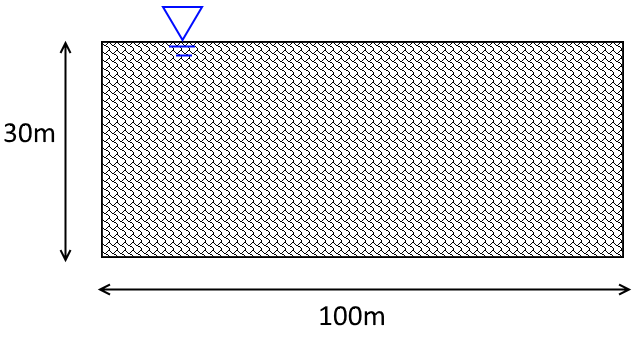

### a)  Discretize el problema considerando dh = 1m

In [ ]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
import tqdm

ITERATIONS = 10000 # Número de iteraciones

# Reemplace los valores del sistema
ancho = 1
alto = 1
dh = 0.1

# Almacenamos cantidad de celdas de la matriz
w = int(ancho / dh)
h = int(alto / dh)

# Creamos la matriz (mallado)
matrix = np.zeros((h, w))

# Definimos la condición de borde
matrix[0, :] = alto
# ¿Se requiere de más condiciones de borde?

### b) Encuentre la expresión para calcular la carga h(x,y) en cada punto de su discretización

ESCRIBA AQUÍ SU EXPRESIÓN

El siguiente código recorre todo el dominio, resolviendo la ecuación:

In [ ]:
for _ in tqdm.tqdm(range(ITERATIONS)):

    # Borde izquierdo
    for i in range(1, h - 1):
        matrix[i, 0] = 0.25 * (2 * matrix[i, 1] + matrix[i - 1, 0] + matrix[i + 1, 0])
        
    # Borde derecho
    for i in range(1, h - 1):
        matrix[i, w - 1] = 0.25 * (2 * matrix[i, w - 2] + matrix[i - 1, w - 1] + matrix[i + 1, w - 1])
        
    # Borde inferior
    for j in range(1, w - 1):
        matrix[h - 1, j] = 0.25 * (2 * matrix[h - 2, j] + matrix[h - 1, j - 1] + matrix[h - 1, j + 1])

    # Esquina izquierda
    matrix[h - 1, 0] = 0.5 * (matrix[h - 2, 0] + matrix[h - 1, 1])

    # Esquina derecha
    matrix[h - 1, w - 1] = 0.5 * (matrix[h - 2, w - 1] + matrix[h - 1, w - 2])

    # Trabajamos en el interior del sistema
    for i in range(1, h - 1): # fila
        for j in range(1, w - 1): # columnas
            matrix[i, j] = 0.25 * (matrix[i - 1, j] + matrix[i + 1, j] + matrix[i, j - 1] + matrix[i, j + 1])

El siguiente código genera un gráfico del sistema

In [ ]:
def generarGrafico(m):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Se agrega grafico al plot
    cax = ax.imshow(m)
    fig.colorbar(cax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Función potencial h(x,y)')

    plt.show()
    
generarGrafico(matrix)

### c) ¿Qué debería suceder en la solución si el estanque posee una filtración en su base, en la cual se registra una carga constante de 50m?, ¿Esta es tipo Dirichlet o Neumann? Grafique su solución.

In [ ]:
# ESCRIBA AQUÍ SU CÓDIGO
# GRAFIQUE LA SOLUCIÓN

### d) Si existe un sólido dentro del dominio (suelo) el cual imprime una condición de borde de Neumann, ¿Qué cambios propondría en el código de b) para solucionar el problema?. Evalúe el caso c) considerando una región cudrada de tamaño 10x10 en el medio del estanque.

In [ ]:
# Su código debe ser capaz de resolver un problema con una región NaN en su interior

# Pregunta 2 - Métodos Numéricos

Un refugio en lo alto de una montaña tiene una esquina curva y se encuentra en un ambiente cuya temperatura externa es 0°C. El muro sur posee una estufa que mantiene la temperatura en 10°C. Dado que no hay fuentes térmicas en el interior, se sabe que la temperatura 𝑇 cumple con la ecuación de Laplace $\nabla^2 T = 0$ en el interior del dominio.

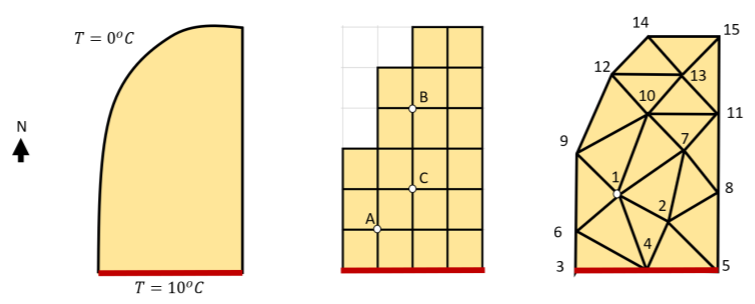

Aproximaremos la esquina curva de distintas formas para poder utilizar los métodos de diferencias finitas y de elementos finitos según la figura. Para el caso de diferencias finitas, la numeración de puntos incógnitos se realiza desde la esquina inferior izquierda hacia la derecha, y luego hacia arriba. Cada celda tiene ancho y alto igual a 1 metro. Para elementos finitos, utilice los nombres dados para cada punto.

### a) Escriba las ecuaciones del método de diferencias finitas asociadas a los puntos A, B y C. Escriba estas ecuaciones en el sistema matricial 𝐴𝜙 = 𝑏, descomponiéndolas en, tanto en la matriz A como en el vector b.


ESCRIBA SU SOLUCIÓN AQUÍ






### b)  Escriba la ecuación del método de elementos finitos asociada al punto 1. NO calcule las integrales, exprese la ecuación en función de los coeficientes 𝑎(𝜑𝑖, 𝜑𝑗) cuando no sean nulos. Debe indicar apropiadamente cada índice. ¿Qué términos son conocidos y cuáles son incógnitos?, ¿Cuál es la principal ventaja de este método para este caso?

ESCRIBA SU SOLUCIÓN AQUÍ




